# 6.4 Supervised Machine Learning: Regression

## Table of Contents
### 1. Import Libraries and Data
### 2. Check Data
### 3. Data Prep for Regression Analysis
### 4. Regression Analysis
### 5. Assessment

## 1. Import Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Ensure that the graphs created are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Assign path
path = 'C:/Users/clany/OneDrive/Documents/CareerFoundry/Chap 6_Sourcing Open Data/World Happiness Analysis'

In [4]:
# Import Dataframe 

df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'World_Happiness_6_3.csv'), index_col = False )

## 2. Check / Clean Data

In [5]:
df.columns

Index(['Country', 'Region', 'Happiness Score', 'GDP per Capita',
       'Social Support', 'Health', 'Freedom', 'Generosity',
       'Corruption Perception', 'Year', 'Overall Rank', 'Covid Status Year',
       'Happiness Barometer'],
      dtype='object')

In [6]:
df.head(20)

,Country,Region,Happiness Score,GDP per Capita,Social Support,Health,Freedom,Generosity,Corruption Perception,Year,Overall Rank,Covid Status Year,Happiness Barometer
0,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2015.0,1.0,Before Covid,Happy Nation
1,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2015.0,2.0,Before Covid,Happy Nation
2,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2015.0,3.0,Before Covid,Happy Nation
3,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,2015.0,4.0,Before Covid,Happy Nation
4,Canada,North America and ANZ,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,2015.0,5.0,Before Covid,Happy Nation
5,Finland,Western Europe,7.406,1.29025,1.31826,0.88911,0.64169,0.23351,0.41372,2015.0,6.0,Before Covid,Happy Nation
6,Netherlands,Western Europe,7.378,1.32944,1.28017,0.89284,0.61576,0.47610,0.31814,2015.0,7.0,Before Covid,Happy Nation
7,Sweden,Western Europe,7.364,1.33171,1.28907,0.91087,0.65980,0.36262,0.43844,2015.0,8.0,Before Covid,Happy Nation
8,New Zealand,North America and ANZ,7.286,1.25018,1.31967,0.90837,0.63938,0.47501,0.42922,2015.0,9.0,Before Covid,Happy Nation
9,Australia,North America and ANZ,7.284,1.33358,1.30923,0.93156,0.65124,0.43562,0.35637,2015.0,10.0,Before Covid,Happy Nation


In [7]:
df.shape

(1367, 13)

Check for Missing Values

In [8]:
# Check for missing values
df.isnull().sum()

Country                  0
Region                   0
Happiness Score          0
GDP per Capita           0
Social Support           0
Health                   1
Freedom                  0
Generosity               0
Corruption Perception    0
Year                     0
Overall Rank             0
Covid Status Year        0
Happiness Barometer      0
dtype: int64

The above Health NaN value has already been addressed in task 6.2 and will be kept as such to avoid data distortion

Check for Duplicates

In [9]:
# Duplicate Check
df_dups = df.duplicated()

In [10]:
df_dups.shape

(1367,)

In [12]:
# Data Statistics
df.describe()

,Happiness Score,GDP per Capita,Social Support,Health,Freedom,Generosity,Corruption Perception,Year,Overall Rank
count,1367.000000,1367.000000,1367.000000,1366.000000,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000
mean,5.441086,1.019422,1.045334,0.584043,0.450771,0.196260,0.132275,2018.903438,76.580834
std,1.117909,0.453703,0.331163,0.245117,0.156733,0.113301,0.112514,2.561006,44.088830
min,1.859000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000,1.000000
25%,4.599500,0.696326,0.832022,0.402301,0.356000,0.115000,0.056884,2017.000000,38.500000
50%,5.440000,1.043000,1.083000,0.612830,0.467610,0.182700,0.097000,2019.000000,76.000000
75%,6.256300,1.338473,1.299985,0.777614,0.568685,0.252858,0.165890,2021.000000,114.000000
max,7.842000,2.209000,1.644000,1.141000,0.772000,0.838075,0.587000,2023.000000,158.000000


Check for Extreme Values

C:\Users\clany\AppData\Local\Temp\ipykernel_5780\70369954.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Happiness Score'], bins = 20)


<Axes: xlabel='Happiness Score', ylabel='Density'>

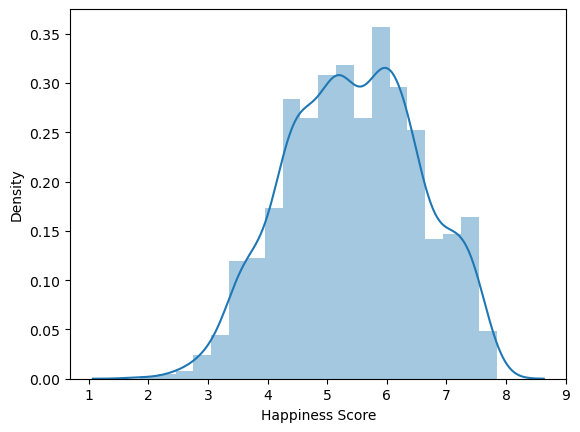

In [13]:
# Check for extreme values
sns.distplot(df['Happiness Score'], bins = 20)

In [14]:
# Check the mean 
df['Happiness Score'].mean()

5.441086100337235

In [15]:
# Check the median
df['Happiness Score'].median()

5.44

In [16]:
# Check the max 
df['Happiness Score'].max()

7.842

## 3. Data Prep for Regression Analysis

Create a Scatterplot

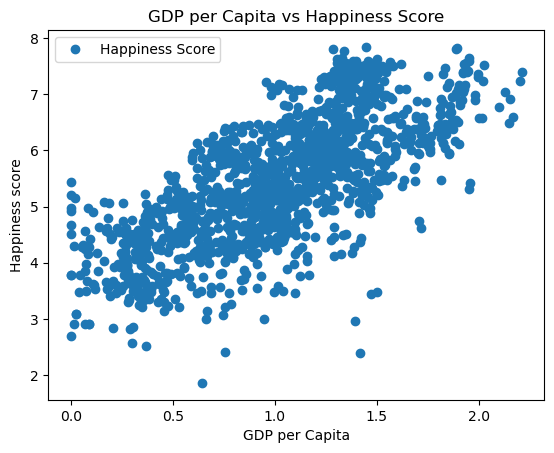

In [17]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other
df.plot(x = 'GDP per Capita', y = 'Happiness Score',style = 'o') 
plt.title('GDP per Capita vs Happiness Score')  
plt.xlabel('GDP per Capita')  
plt.ylabel('Happiness score')  
plt.show()

### Hypothesis

Countries enjoying higher GDP per capita tend to show elevated happiness scores, indicating that economic prosperity significantly predicts happiness.

### Reshaping Variables

In [18]:
# Reshape the variables into NumPy arrays and put them into separate objects
X = df['GDP per Capita'].values.reshape(-1,1)
y = df['Happiness Score'].values.reshape(-1,1)

In [19]:
X

array([[1.39651],
       [1.30232],
       [1.32548],
       ...,
       [0.67   ],
       [1.417  ],
       [0.645  ]])

In [20]:
y

array([[7.587],
       [7.561],
       [7.527],
       ...,
       [3.138],
       [2.392],
       [1.859]])

### Splitting data into a Training and a Test Set

In [21]:
# Split data into a training set and a test set 

# GDP per Capita
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 4. Regression Analysis

### Create a Regression Object

In [22]:
# Create a regression object.
regression = LinearRegression()  # This is the regression object, which will be fit onto the training set

### Fit the Regression Object to the Training Set

In [23]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [24]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

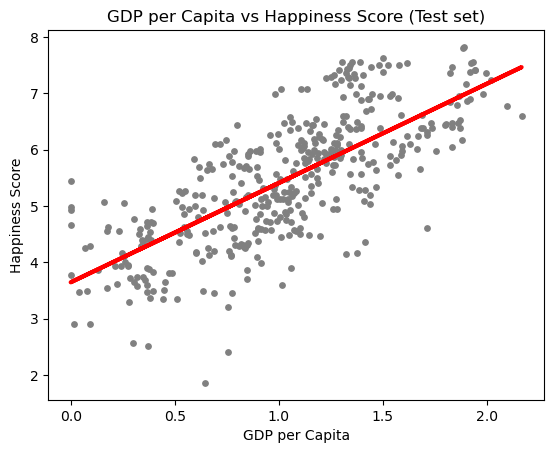

<Figure size 640x480 with 0 Axes>

In [25]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('GDP per Capita vs Happiness Score (Test set)')
plot_test.xlabel('GDP per Capita')
plot_test.ylabel('Happiness Score')
plot_test.show()
plot_test.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'PlotTest_GDPvsHappiness'),bbox_inches='tight', pad_inches=0.1)


The regression line includes numerous data points, but there are several exceptions or points that it does not account for. While there is certainly a positive correlation between the two variables, there could be other factors influencing the relationship. This is evident as some points with identical GDP values display different positions on their Happiness Scores.

### Check the Model Performance Statistics - MSE and R2 score

In [26]:
# Create objects that contain the model summary statistics

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score

In [27]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.76082892]]
Mean squared error:  0.5797952380476851
R2 score:  0.5572654226986757


In [28]:
y_predicted

array([[5.86312006],
       [4.29598232],
       [5.14646269],
       [5.51387725],
       [5.51137688],
       [5.2871001 ],
       [6.25161707],
       [5.01263969],
       [3.87813762],
       [6.62908064],
       [3.77829862],
       [6.87383586],
       [6.08146285],
       [4.20762393],
       [4.12886205],
       [4.28714296],
       [4.34445794],
       [5.89786122],
       [4.94814053],
       [5.42291283],
       [5.21026195],
       [3.71679653],
       [6.85446675],
       [5.01616135],
       [5.49686765],
       [4.09172617],
       [5.22568383],
       [6.58153826],
       [5.52306878],
       [5.9496648 ],
       [5.8472726 ],
       [4.70408101],
       [7.06928788],
       [5.66590722],
       [5.49510682],
       [6.00046472],
       [5.032973  ],
       [5.47397687],
       [5.88777167],
       [4.56480807],
       [5.63081411],
       [4.29353523],
       [5.84801215],
       [6.03828732],
       [6.29266483],
       [4.98798809],
       [5.73102268],
       [6.104

In [29]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,4.9480,5.863120
1,2.5230,4.295982
2,4.3400,5.146463
3,6.4850,5.513877
4,3.8960,5.511377
5,4.5740,5.287100
6,7.5040,6.251617
7,4.6030,5.012640
8,3.8560,3.878138
9,6.3770,6.629081


### Compare how the regression fits the training set

In [30]:
# Predict
y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [31]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [32]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.76082892]]
Mean squared error:  0.6010546439340066
R2 score:  0.5083190890242177


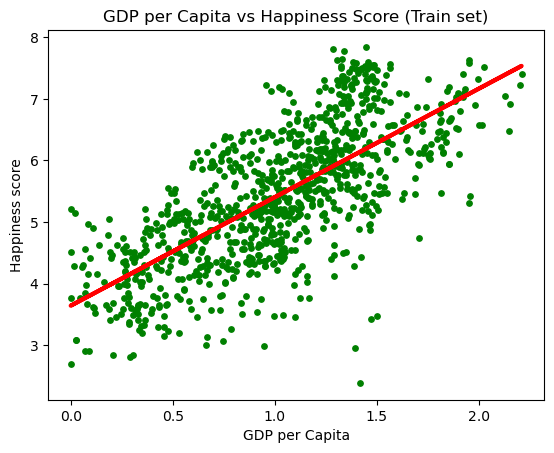

<Figure size 640x480 with 0 Axes>

In [33]:
# Visualizing the training set results
plot_test = plt
plot_test.scatter(X_train, y_train, color = 'green', s = 15)
plot_test.plot(X_train, y_predicted_train, color = 'red', linewidth = 3)
plot_test.title('GDP per Capita vs Happiness Score (Train set)')
plot_test.xlabel('GDP per Capita')
plot_test.ylabel('Happiness score')
plot_test.show()
plot_test.savefig(os.path.join(path, 'PlotTest_GDPvsHappinessTrainSet'),bbox_inches='tight', pad_inches=0.1)

### Reflections on model performance

A moderate positive correlation between the GDP per capita and the Happiness score can be observed. However, this correlation alone isn't adequate for precise determination of the Happiness Score. There is still considerable disparity between the actual and predicted values, indicating that our model lacks accuracy. The relationship doesn't conform to a singular, linear regression line. Consequently, the hypothesis needs to be partially reconsidered: while there's a slight positive relationship, the variance in data cannot be entirely explained by this linear relationship.

In this scenario, retaining the outliers might be preferable, as excluding them might falsely reinforce the notion that social support heavily influences the happiness score. However, multiple outliers suggest a somewhat different outcome, and excluding them could introduce bias.